## 0. Import the Packages

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn.model_selection import train_test_split


## 1. Load the Exam score data

In [2]:
data1 = pd.read_csv("./ex2data1.csv")

In [3]:
data1.columns = ['Exam_Score1', 'Exam_Score2', 'Labels']

In [4]:
data1.head(5)

,Exam_Score1,Exam_Score2,Labels
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


## 2. Plotting a Exam score data

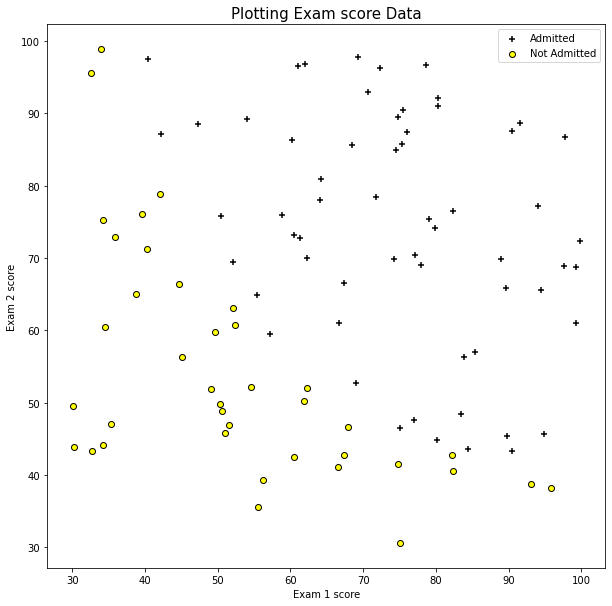

In [5]:
plt.figure(figsize=(10,10))
admitted = data1[data1['Labels'] == 1]
notAdmitted = data1[data1['Labels'] == 0]

admitted_s = plt.scatter(admitted["Exam_Score1"], admitted["Exam_Score2"], marker= "+", color  = "black")
notAdmitted_s = plt.scatter(notAdmitted["Exam_Score1"], notAdmitted["Exam_Score2"], marker = "o", color = "yellow", edgecolors= "black")

plt.legend((admitted_s, notAdmitted_s), ("Admitted", "Not Admitted"), loc = "upper right")

plt.title("Plotting Exam score Data", fontsize = 15)

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")

plt.show()

## 3. Model Setting

In [67]:
trainEx1 = np.array(data1["Exam_Score1"], dtype=float)
trainEx2 = np.array(data1["Exam_Score2"], dtype=float)
trainLabels = np.array(data1["Labels"], dtype=int)

In [78]:
trainEx1_std = (trainEx1 - trainEx1.mean()) / trainEx1.std()
trainEx2_std = (trainEx2 - trainEx2.mean()) / trainEx2.std()
trainFeatures = np.stack((trainEx1_std, trainEx2_std), 1)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(trainFeatures, trainLabels, test_size=0.2)

In [80]:
model = tf.keras.Sequential()
model.add(Dense(units=64, activation='relu', input_shape= (2,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=24, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
            loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                192       
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 24)                792       
                                                                 
 dense_19 (Dense)            (None, 1)                 25        
                                                                 
Total params: 3,089
Trainable params: 3,089
Non-trainable params: 0
_________________________________________________________________


/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## 4. Model fitting

In [81]:
history = model.fit(x_train, y_train, epochs=500, batch_size=20, validation_split= 0.25)

Epoch 1/500
1/3 [=========>....................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5000

2022-10-03 17:54:50.318997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 74ms/step - loss: 0.5577 - accuracy: 0.6102 - val_loss: 0.4618 - val_accuracy: 0.8000
Epoch 2/500
3/3 [==============================] - 0s 15ms/step - loss: 0.4464 - accuracy: 0.8305 - val_loss: 0.1998 - val_accuracy: 0.9500
Epoch 3/500
3/3 [==============================] - 0s 16ms/step - loss: 0.2827 - accuracy: 0.8814 - val_loss: 0.1664 - val_accuracy: 0.9500
Epoch 4/500
3/3 [==============================] - 0s 14ms/step - loss: 0.2176 - accuracy: 0.9322 - val_loss: 0.1428 - val_accuracy: 0.9500
Epoch 5/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1463 - accuracy: 0.9500

2022-10-03 17:54:50.569378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 15ms/step - loss: 0.1946 - accuracy: 0.9322 - val_loss: 0.1427 - val_accuracy: 0.9500
Epoch 6/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1794 - accuracy: 0.9322 - val_loss: 0.1310 - val_accuracy: 0.9500
Epoch 7/500
3/3 [==============================] - 0s 14ms/step - loss: 0.1383 - accuracy: 0.9492 - val_loss: 0.1227 - val_accuracy: 0.9500
Epoch 8/500
3/3 [==============================] - 0s 14ms/step - loss: 0.1162 - accuracy: 0.9492 - val_loss: 0.1114 - val_accuracy: 0.9500
Epoch 9/500
3/3 [==============================] - 0s 14ms/step - loss: 0.1122 - accuracy: 0.9492 - val_loss: 0.0829 - val_accuracy: 0.9500
Epoch 10/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1684 - accuracy: 0.9492 - val_loss: 0.0567 - val_accuracy: 0.9500
Epoch 11/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1045 - accuracy: 0.9492 - val_loss: 0.0688 - val_accuracy: 0.9500
Epoch 12/500
3/3 [============

## 5. Model validation

In [82]:
test_loss, test_acc = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 104ms/step - loss: 0.5031 - accuracy: 0.9000


2022-10-03 17:55:12.299447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


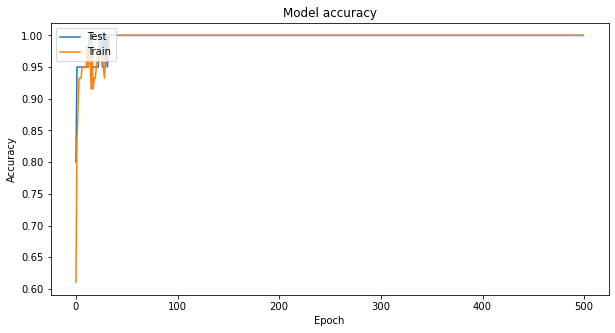

In [126]:
plt.figure(figsize=(10,5))
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

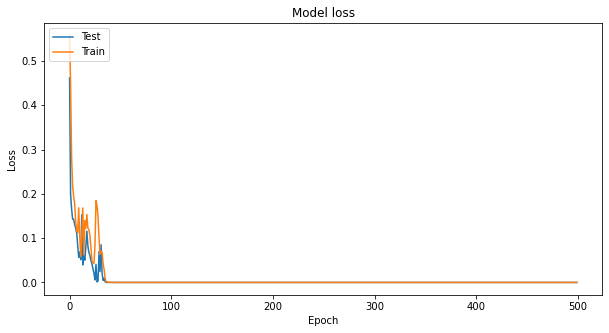

In [127]:
plt.figure(figsize=(10,5))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

## 6. Model Prediction (Test)

2022-10-03 17:55:22.237420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


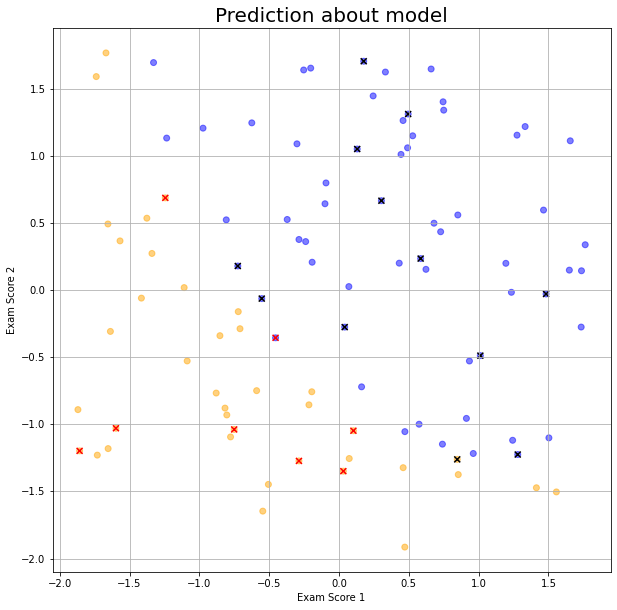

In [85]:
predictedLabels = model.predict(x_test)
predictedLabels = [int(label >= 0.5) for label in predictedLabels]

colors = ['red', 'black']
colors1 =['orange', 'blue']
colorsList = [colors1[int(label)] for label in trainLabels]
colorsListPredicted = [colors[label] for label in predictedLabels]

plt.figure(figsize=(10,10))
plt.scatter(trainEx1_std, trainEx2_std, c=colorsList, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=colorsListPredicted, marker='x')
plt.title("Prediction about model", fontsize = 20)
plt.xlabel('Exam Score 1')
plt.ylabel('Exam Score 2')
plt.grid()
plt.show()

## 7. plot decision boundary

In [117]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('yellow', 'black', 'lightgreen', 'blue', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    print(Z)
    plt.figure(figsize=(10,10))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [118]:
X_combined_std = np.vstack((x_train, x_test))
# 왼쪽에서 오른쪽으로 붙이기
y_combined = np.hstack((y_train, y_test))


[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.0554172e-36
  2.2589529e-36 2.4844558e-36]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.3502696e-36
  5.8847716e-36 6.4723297e-36]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.3930483e-35
  1.5330434e-35 1.6860991e-35]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0000000e+00]]


/var/folders/5h/f5j48qs1681606417fqnrggw0000gn/T/ipykernel_10306/1749102256.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


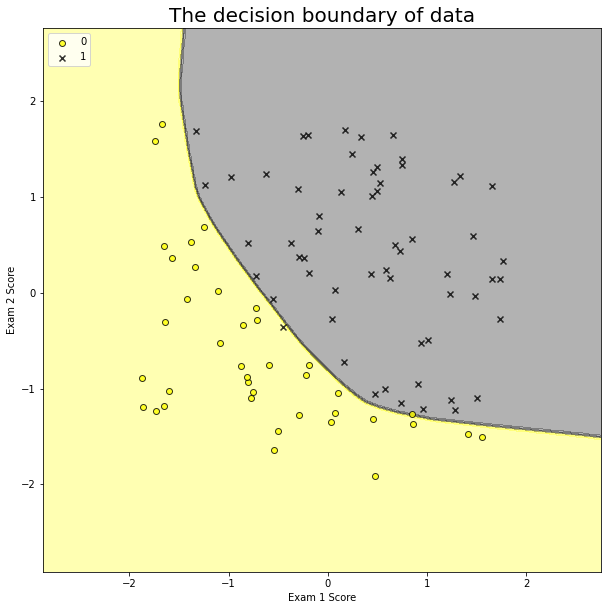

<Figure size 720x720 with 0 Axes>

In [120]:
plot_decision_boundary(X=X_combined_std, y=y_combined, classifier=model)

plt.title("The decision boundary of data", fontsize=20)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(loc='upper left')
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.show()